# Data Science Python

The goal is to learn about Python and commonly used Data Science libraries in the field.

We'll go over a bit of Python, Numpy and Pandas and then we'll load a WHO dataset and try to predict life expectancy given various factors.

## 1. Basic Python

#### Variables

Variables allow for storing any value with a label.
They can be used for later operations.

In [ ]:
my_int = 3 # integer
my_float = 3.14 # floating point
my_string = "hello" # string
my_list = [5, 23, 5] # list
my_dict = { "alice": 20, "bob": 21 } # dictionary

print(my_int)
print(my_float)
print(my_string)
print(my_list[1])
print(my_dict["bob"])

Variables can be used with operators.

In [ ]:
one = 1
two = 2

res = one + two
print(res)

#### Control flow

Control flow allows us to define conditions and branch of to different parts of code as we desire.

In [ ]:
age = 20

if age < 18:
    print("You are under 18")
elif age >= 18 and age < 40:
    print("You are between 18 and 40")
else:
    print("You are over 40")

#### Loops

Repeat code until a condition is satisfied.

For loops are typically used to iterate over lists.

In [ ]:
counter = 0
while counter < 5:
    print(counter)
    counter += 1

In [ ]:
elems = [4, 334, 56]

for elem in elems:
    print(elem)

#### Functions

Functions allow to define routines that take inputs and return ouputs.

In [ ]:
def add(input1, input2):
    return input1 + input2

res = add(1, 2)
print(res)

Functions can also be defined inline or anonymously, which we call lambda functions.

This is a brief example of what we call functional programming.

`map` is a function that takes as arguments a function and a list. It returns a new list with the given function applied to every element of the list.

In [ ]:
arr = [1, 2, 3]

arr = map(lambda x: x + 1, arr)

list(arr)

#### Classes

Classes allow for the creation of custom data types by composing already existing data types. The variables that compose a class are called attributes.

Functions, called methods in the context on a class can act upon the attributes of that class.

A class exists as an abstract blueprint. We say we instantiate a class when we define it into a variable. An instantiated class is called an object.

`self` refers to the current instance and allows the methods to act on it.

In [ ]:
class Person:
    def __init__(self, name, age, university):
        self.name = name
        self.age = age
        self.university = university
        
    def is_over_18(self):
        return self.age >= 18
    
    def is_at_imperial(self):
        return self.university == 'imperial'
    
    def present(self):
        return f"Hi I'm {self.name}, I'm {self.age} and I study at {self.university}"

In [ ]:
alice = Person("alice", 20, "imperial")
bob = Person("bob", 17, "ucl")

print(alice.is_over_18())
print(alice.present())
print(bob.present())

## 2. Numpy

Numpy is a powerful computing library, mainly used to efficiently manipulate n-dimensional arrays.

In [ ]:
import numpy as np

#### Creating arrays and indexing

We create a simple array and show all the different ways of indexing.

!! Note that arrays are 0-indexed so the first element is at index 0, second element at index 1 etc

The syntax is `arr[a:b:c]`.
- a is the starting index, it is inclusive. If omitted it is assumed 0 (beginning of array)
- b is the end index, it is exclusive. If omitted it is assumed len(arr) (end of array)
- c is the step. If omitted it is assumed 1.

In [ ]:
arr = np.array([1, 2, 3, 4, 5])

print(arr) # entire array
print(arr[1]) # get second item: 2
print(arr[-1]) # get last item: 5
print(arr[1:3]) # get items between indices 1 (inclusive) and 3 (exclusive): [2, 3]
print(arr[1:]) # get items from index 1 (inclusive) onwards: [2, 3, 4, 5]
print(arr[:2]) # get items until index 2 (exclusive): [1, 2]
print(arr[::2]) # get all items with step 2: [1, 3, 5]

Numpy also has handy methods to create specific arrays.

In [ ]:
np.zeros(5) # Create all zeros array of size 5

In [ ]:
np.ones([3, 3]) # Create all ones matrix of size 3x3

We can create n-dimensional arrays as we want to get manipulate vectors, matrices, tensors etc

In [ ]:
arr = np.zeros(3) # R3 vector
matrix = np.zeros([3, 3]) # R3x3 matrix
tensor = np.zeros([3, 3, 3]) # R3x3x3 tensor

tensor[1][2][0] # Access element

#### Slicing

In [ ]:
arr = np.array([[0,  1,  2],
                [3,  4,  5],
                [6,  7,  8],
                [9, 10, 11]])

print(arr[:, 0:2]) # Get all rows and columns between 0 (inclusive) and 2 (exclusive)

#### Boolean indexing

In [ ]:
a = np.arange(10) # Creates array [0, 1, 2, ..., 9]
print(a[a < 5]) # prints [0, 1, 2, 3, 4]
print(a[a % 2 == 0]) # prints [0, 2, 4, 6, 8]

#### Shapes

The `shape` method returns the dimensions of a Numpy array and is often used for debugging.

The `reshape` method allows us to change the shape of our array, for instance going from a 9-dimensional vector to a 3x3 matrix.

In [ ]:
a = np.array([0, 1, 2])
print(a.shape) # prints 3

b = np.array([[0, 1, 2],
              [3, 4, 5],
              [6, 7, 8]])
print(b.shape) # prints (3, 3)

In [ ]:
a = np.arange(9)
print(a)

a = a.reshape(3, 3)
print(a)

If we know all the dimensions but one we can omit it by using `-1` and it will be infered by Numpy.

In [ ]:
a = np.arange(9)
print(a)

a = a.reshape(3, -1)
print(a)

#### Operations

Numpy arrays support a very wide variety of operations such as the following:

In [ ]:
a = np.arange(9)

print(a * a)
print(a / 2)
print(a.sum())
print(a.mean())
print(a.dot(a))

## 3. Pandas

Pandas is a data analysis and manipulation library. It is typically used to load, manipulate and store data.

In [2]:
import pandas as pd

#### Series

Series are one dimensional array-like object which have and index.

Typically used to represent data across time or any value with respect to another value.

In [ ]:
s = pd.Series([12, 312, 56, 32, 34], index=[0, 1, 2, 3, 4])
print(s)
print("")
print(s[2])

#### DataFrames

DataFrames are like tables.

They are two dimensional data structures with an index and columns.

In [ ]:
df = pd.DataFrame(
    {
        'col1': [1, 2],
        'col2': [3, 4]
    }
)

print(df)

In [ ]:
df['col2']

## 4. WHO Example

We will load a dataset by the WHO that contains 2939 lines of data about life expectancy with lots of factors.

Factors include Measles rate, GDP, AIDS rate, Population, alcohol consumption etc.

The dataset is located under `workshops/data/life_expectancy.csv`

#### Loading the data

We will use a Pandas DataFrame to store the data from the csv file.

In [3]:
data = pd.read_csv('./../../data/life_expectancy.csv')
print(len(data))
display(data.head())
print(data.columns)

2938


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [4]:
# Rename column
data = data.rename(columns={
    'Life expectancy ': 'life expectancy',
    ' BMI ': 'bmi',
})
data.head()

,Country,Year,Status,life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# We have some missing data ! notice the NaN values (Not a Number)
data.iloc[32]

#### Removing incomplete data

We remove all rows that have `null` values.

In [5]:
data = data.dropna()
len(data)

1649

#### Selecting data

In [ ]:
data[data['Country'] == 'Ukraine']

In [ ]:
data[data['Hepatitis B'] < 5]

#### Grouping & apply

Let's see how we can compute the average life expectancy per country with the data we have

In [ ]:
# We start by grouping by country
data.groupby('Country').apply(lambda it: display(it))

In [ ]:
def per_country(df):
    return df['life expectancy'].mean()

avg = data.groupby('Country').apply(per_country)
display(avg)

#### Plotting data

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

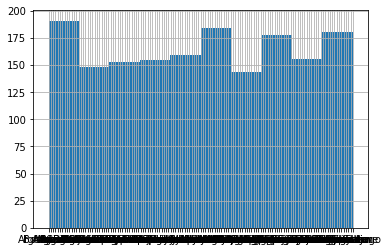

In [7]:
data['Country'].hist()

In [ ]:
data['GDP'].hist()

In [ ]:
plt.scatter(data['GDP'], data['life expectancy'])